In [232]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [233]:
small_cap_stock = "DELTACORP.NS"
large_cap_stock = "KMSUGAR.NS"

start_date = "2021-06-10"
end_date = "2023-06-10"

In [234]:
small_cap_data = yf.download(small_cap_stock, start=start_date, end=end_date)
large_cap_data = yf.download(large_cap_stock, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [235]:
def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + num_std * rolling_std
    lower_band = rolling_mean - num_std * rolling_std
    return upper_band, rolling_mean, lower_band

small_cap_data['Upper'], small_cap_data['SMA'], small_cap_data['Lower'] = calculate_bollinger_bands(small_cap_data)
large_cap_data['Upper'], large_cap_data['SMA'], large_cap_data['Lower'] = calculate_bollinger_bands(large_cap_data)


In [236]:
def generate_signals(data):
    signals = []
    for i in range(len(data)):
        if data['Close'][i] > data['Upper'][i]:
            signals.append(-1)  # Sell signal
        elif data['Close'][i] < data['Lower'][i]:
            signals.append(1)   # Buy signal
        else:
            signals.append(0)   # Hold signal
    return signals

small_cap_data['Signal'] = generate_signals(small_cap_data)
large_cap_data['Signal'] = generate_signals(large_cap_data)

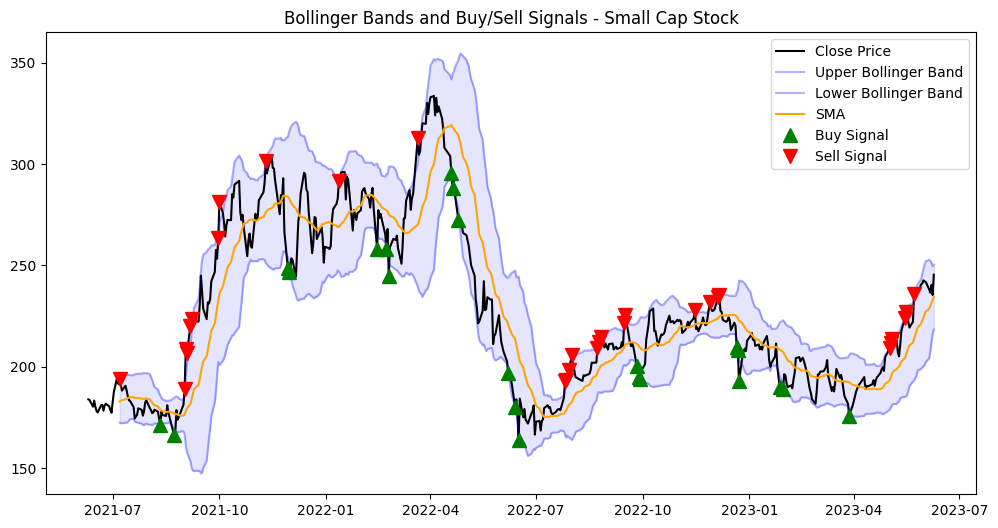

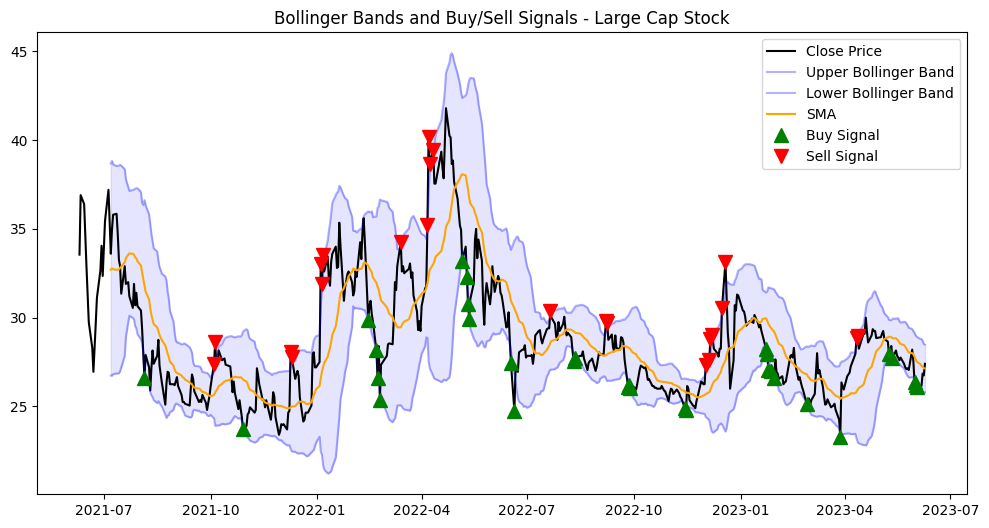

In [237]:
plt.figure(figsize=(12, 6))
plt.plot(small_cap_data.index, small_cap_data['Close'], label='Close Price', color='black')
plt.plot(small_cap_data.index, small_cap_data['Upper'], label='Upper Bollinger Band', color='blue', alpha=0.3)
plt.plot(small_cap_data.index, small_cap_data['Lower'], label='Lower Bollinger Band', color='blue', alpha=0.3)
plt.fill_between(small_cap_data.index, small_cap_data['Upper'], small_cap_data['Lower'], color='blue', alpha=0.1)
plt.plot(small_cap_data.index, small_cap_data['SMA'], label='SMA', color='orange')
plt.plot(small_cap_data[small_cap_data['Signal'] == 1].index, small_cap_data['Close'][small_cap_data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(small_cap_data[small_cap_data['Signal'] == -1].index, small_cap_data['Close'][small_cap_data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('Bollinger Bands and Buy/Sell Signals - Small Cap Stock')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(large_cap_data.index, large_cap_data['Close'], label='Close Price', color='black')
plt.plot(large_cap_data.index, large_cap_data['Upper'], label='Upper Bollinger Band', color='blue', alpha=0.3)
plt.plot(large_cap_data.index, large_cap_data['Lower'], label='Lower Bollinger Band', color='blue', alpha=0.3)
plt.fill_between(large_cap_data.index, large_cap_data['Upper'], large_cap_data['Lower'], color='blue', alpha=0.1)
plt.plot(large_cap_data.index, large_cap_data['SMA'], label='SMA', color='orange')
plt.plot(large_cap_data[large_cap_data['Signal'] == 1].index, large_cap_data['Close'][large_cap_data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(large_cap_data[large_cap_data['Signal'] == -1].index, large_cap_data['Close'][large_cap_data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('Bollinger Bands and Buy/Sell Signals - Large Cap Stock')
plt.legend()
plt.show()

In [238]:
small_cap_data['Returns'] = small_cap_data['Close'].pct_change()
large_cap_data['Returns'] = large_cap_data['Close'].pct_change()

small_cap_data['Cumulative Returns'] = (1 + small_cap_data['Returns']).cumprod()
large_cap_data['Cumulative Returns'] = (1 + large_cap_data['Returns']).cumprod()

risk_free_rate = 0.05   # Assume a 5% annual risk-free rate
trading_days_per_year = 252   # Assuming 252 trading days in a year
small_cap_sharpe_ratio = (small_cap_data['Returns'].mean() - risk_free_rate) / (small_cap_data['Returns'].std() * np.sqrt(trading_days_per_year))
large_cap_sharpe_ratio = (large_cap_data['Returns'].mean() - risk_free_rate) / (large_cap_data['Returns'].std() * np.sqrt(trading_days_per_year))

initial_capital = 100000
small_cap_data['Portfolio Value'] = initial_capital * small_cap_data['Cumulative Returns']
large_cap_data['Portfolio Value'] = initial_capital * large_cap_data['Cumulative Returns']

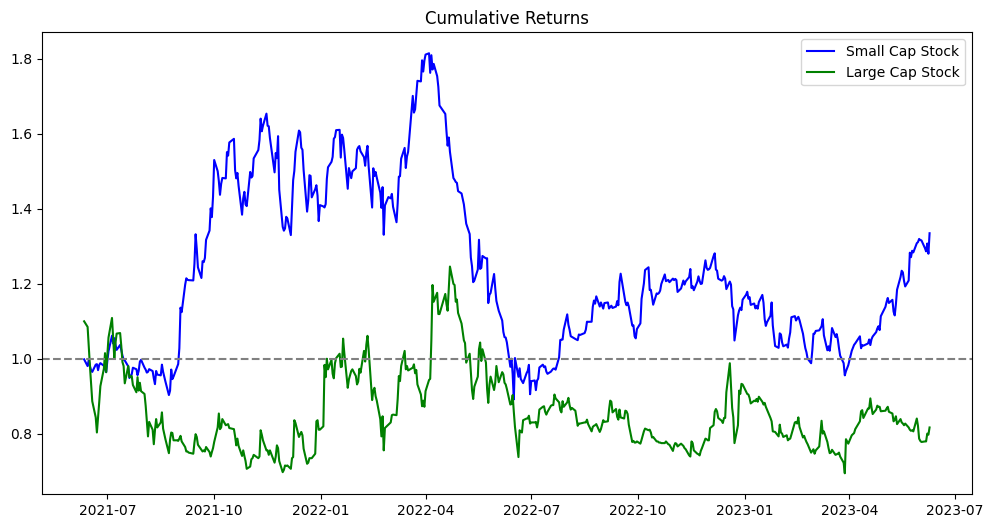

Sharpe Ratio for Small Cap Stock: -0.11338015499634052
Sharpe Ratio for Large Cap Stock: -0.09148840763663188


In [239]:
plt.figure(figsize=(12, 6))
plt.plot(small_cap_data.index, small_cap_data['Cumulative Returns'], label='Small Cap Stock', color='b')
plt.plot(large_cap_data.index, large_cap_data['Cumulative Returns'], label='Large Cap Stock', color='g')
plt.axhline(y=1, color='gray', linestyle='--')
plt.title('Cumulative Returns')
plt.legend()
plt.show()

print("Sharpe Ratio for Small Cap Stock:", small_cap_sharpe_ratio)
print("Sharpe Ratio for Large Cap Stock:", large_cap_sharpe_ratio)

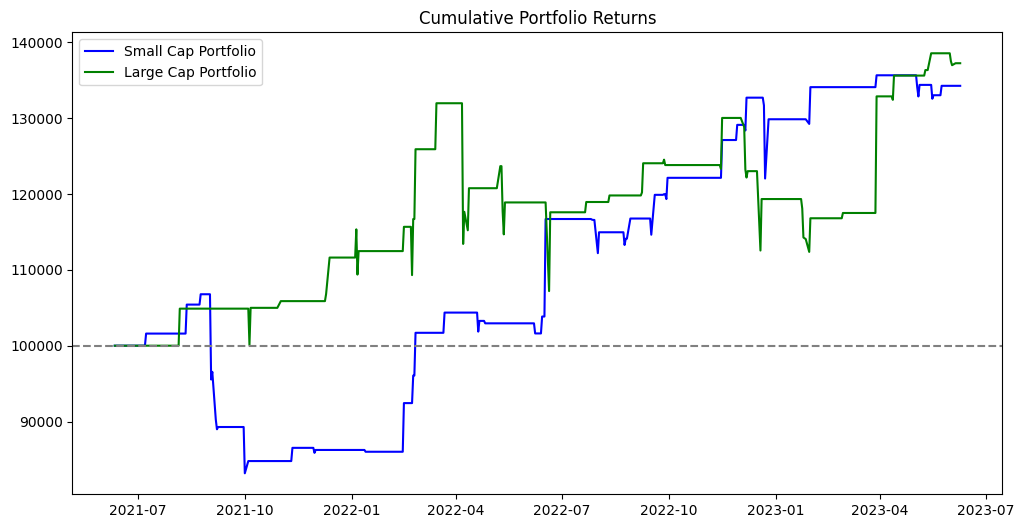

Sharpe Ratio for Small Cap Portfolio: -0.25856962699523117
Sharpe Ratio for Large Cap Portfolio: -0.2022018338615934


In [240]:
small_cap_data['Portfolio Returns'] = small_cap_data['Returns'] * small_cap_data['Signal'].shift(1)
large_cap_data['Portfolio Returns'] = large_cap_data['Returns'] * large_cap_data['Signal'].shift(1)

small_cap_data['Cumulative Portfolio Returns'] = (1 + small_cap_data['Portfolio Returns']).cumprod()
large_cap_data['Cumulative Portfolio Returns'] = (1 + large_cap_data['Portfolio Returns']).cumprod()

small_cap_data['Portfolio Value'] = initial_capital * small_cap_data['Cumulative Portfolio Returns']
large_cap_data['Portfolio Value'] = initial_capital * large_cap_data['Cumulative Portfolio Returns']

plt.figure(figsize=(12, 6))
plt.plot(small_cap_data.index, small_cap_data['Portfolio Value'], label='Small Cap Portfolio', color='b')
plt.plot(large_cap_data.index, large_cap_data['Portfolio Value'], label='Large Cap Portfolio', color='g')
plt.axhline(y=initial_capital, color='gray', linestyle='--')
plt.title('Cumulative Portfolio Returns')
plt.legend()
plt.show()

small_cap_portfolio_sharpe_ratio = (small_cap_data['Portfolio Returns'].mean() - risk_free_rate) / (small_cap_data['Portfolio Returns'].std() * np.sqrt(trading_days_per_year))
large_cap_portfolio_sharpe_ratio = (large_cap_data['Portfolio Returns'].mean() - risk_free_rate) / (large_cap_data['Portfolio Returns'].std() * np.sqrt(trading_days_per_year))

print("Sharpe Ratio for Small Cap Portfolio:", small_cap_portfolio_sharpe_ratio)
print("Sharpe Ratio for Large Cap Portfolio:", large_cap_portfolio_sharpe_ratio)


In [241]:
small_cap_overall_return = (small_cap_data['Portfolio Value'].iloc[-1] - initial_capital) / initial_capital
large_cap_overall_return = (large_cap_data['Portfolio Value'].iloc[-1] - initial_capital) / initial_capital

print("Overall Return for Initial Capital (Small Cap Portfolio): {:.2f}%".format(small_cap_overall_return * 100))
print("Overall Return for Initial Capital (Large Cap Portfolio): {:.2f}%".format(large_cap_overall_return * 100))


Overall Return for Initial Capital (Small Cap Portfolio): 34.28%
Overall Return for Initial Capital (Large Cap Portfolio): 37.26%
